### Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
#### Описание данных:
<b>Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<div class="alert alert-block alert-info"> 
<b> Шаг 1. Откроем файл с данными и изучим общую информацию
</div>

Откроем таблицу и проведем ее предобработку:

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [ ]:
# Откроем файл с данными и выведем первые 10 строк
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Посчитаем количество пустых значений.
print(games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [ ]:
# И для наглядности построим график
def percent_of_nan(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(15,6), legend = False, fontsize = 16, color='red')
            .set_title('Пропуски в столбцах, %' + "\n", fontsize = 22, color = 'Blue')    
        );    
    except:
        print('пропусков не осталось :) ')

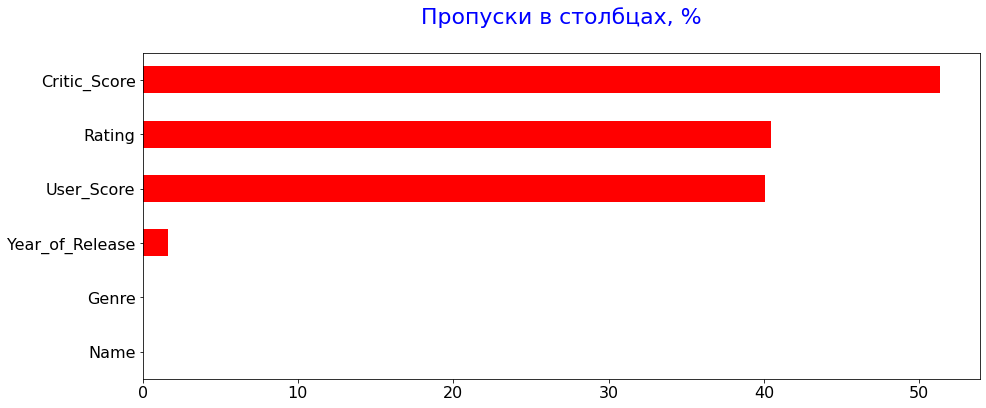

In [ ]:
percent_of_nan(games)

In [ ]:
# Ищем явные дубликаты
games.duplicated().sum()

0

<div class="alert alert-block alert-info"> 
<b> Шаг 2. Подготовим данные
</div>

<div class="alert alert-block alert-info"> 
<b> 2.1 Заменим названия столбцов (приведем к нижнему регистру)
</div>

In [ ]:
# Приведем названия стобцов к нижнему регистру
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Посмотрим информацию о нашей таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет состоит из 16715 строк.

Столбец <b>year_of_release</b> (год выпуска) - приведем к типу int, тк год у нас целое число

Столбец <b>user_score</b> (оценка пользователей) - приведем к вещественному типу.

Удалим строки с пустым значением <b>name и genre</b>, тк их ничтожно мало (всего по 2 шт), <b>year_of_release</b> тоже мало, чуть больше 1,5%, избавимся и от них.  
Пустые строки <b>сritic_score и user_score</b>, удалять не будем, критично большой процент таких строк.  
Оценки могуть быть пропущены по разным причинам, возможно какие-то игры слишком старые, и на тот момент еще не было сервисов с оценками, а возможно есть какая то другая причина, выясним на следующих этапах 
Пропуски в столбце <b>rating</b>. Google нам подсказывает, что ESRB была основана в 1994 году, вероятно, что оценок нет у тех игр, которые вышли ранее, изучим далее

<div class="alert alert-block alert-info"> 
<b>2.2 Преобразуем данные в нужные типы
</div>

In [ ]:
# Приводим к типу int
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [ ]:
# Смотрим уникальные значения в столбце user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что помимо Nan у нас есть значение tbd, что означает "To be determined" - используется, если какая-то информация еще не определена, фактически это тот же Nan, объеденим их

In [ ]:
# Заменяем tbd на nan и приводим к типу float и 
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'] = games['user_score'].astype('float64')

<div class="alert alert-block alert-info"> 
<b> 2.3 Обработаем пропуски
</div>

In [ ]:
# Удаляем пропуски в name и genre
games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Дойдя до пункта с влиянием оценок критиков и пользователей, выяснили, что пропуски нужно чем-то заполнить, но чтобы не искажать данные, поставим "заглушку" в виде отрицательного числа, тк отрицательной оценки в принципе быть не может. Заменим пропущенные значения в столбцах critic_score и user_score на -1

In [ ]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

Также установим заглушку для поля рейтинг, тк рейтинг ESRB предназначен только для игр США, Канады и Мексики

In [ ]:
games['rating'] = games['rating'].fillna('рейтинг не определен')

<div class="alert alert-block alert-info"> 
<b> 2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
</div>

In [ ]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,рейтинг не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,рейтинг не определен,31.38


### Вывод 1
Провели предобработку данных
<b>year_of_release</b> - привели к целочисленному типу
<b>user_score</b> - привели к вещественному типу, <b>'tbd'</b> приравняли к <b>NaN</b>
удалили пропущенные значения в следующих столбцах <b>'name', 'genre', 'year_of_release'</b>, так как их ничтожно мало в нашей выборке.
<b>critic_score, user_score и rating</b> пропущенные значение не удаляем так как процент пропусков огромен, заполнили их невлияющими значениями
добавили столбец <b>total_sales</b> с суммой по всем регионам  





<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец ,что не забываешь о промежуточных выводах! </div>


~~Далее проведем исследовательский анализ данных и попробуем найти ответы на следующие вопросы:  
-Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
-Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
-Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
-Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
-Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
-Соотнесите выводы с продажами игр на других платформах.  
-Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?~~


<div class="alert alert-block alert-info"> 
<b> Шаг 3. Проведем исследовательский анализ данных
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Давай все-таки будеи сохранять структуру проекта по аналогии с заданием. Пунктам нужны названия и нумерация. Кстати, хочу посоветовать [отличную шпаргалку по ячейкам Markdown](https://github.com/sandino/Markdown-Cheatsheet)
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info"> 
<b> 3.1 Посмотрим, сколько игр выпускалось в разные годы. 
</div>

<AxesSubplot:ylabel='Frequency'>

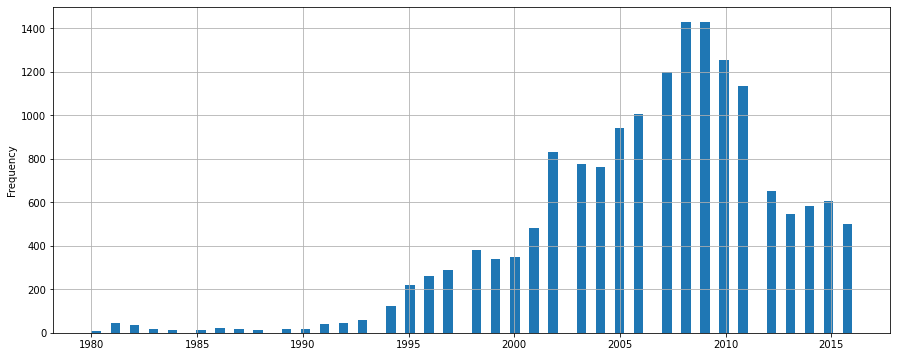

In [ ]:
# Построим график продаж игр по годам 
games['year_of_release'].plot(kind = 'hist',figsize=(15,6), bins = 80, grid=True)

Из графика видим, что рост индустрии начинается после 1990г, и с каждым годом темп только увеличивается, можно объяснить это развитием технологий, увеличением количества владельцев консолей и постепенным улучшением игровой графики. Рост продолжался до 2008-2009гг, после чего наблюдаем заметный спад, возможно на это повлиял экономический кризис, но основным моментом я считаю появление конкурента в лице мобильных телефонов.

<div class="alert alert-block alert-info"> 
<b> 3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами
</div>

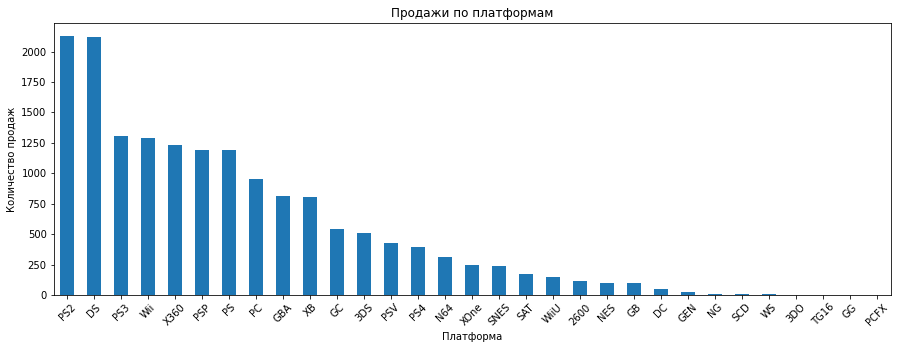

In [ ]:
games['platform'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation = 45)
plt.ylabel('Количество продаж');

Лидеры по количеству продаж Play Station 2 и 3 поколения и Nintendo DS и Wii. Детище Microsoft - Xbox 360 замыкает пятерку

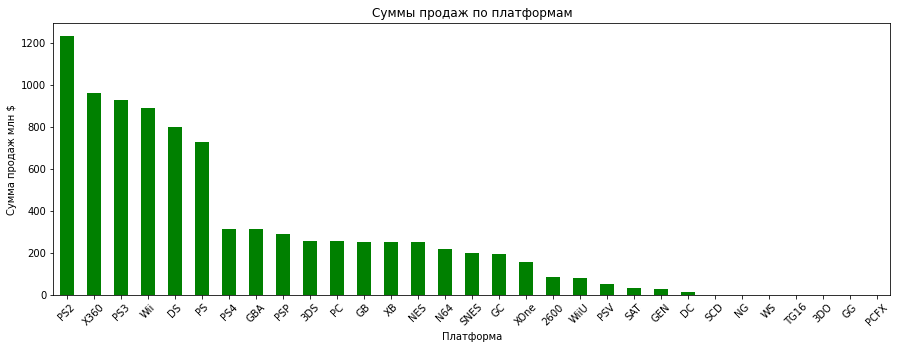

In [ ]:
# Посчитаем теперь в денежном значении
(
    games
    .pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', color='green', legend = False, figsize=(15,5))
)
plt.title('Суммы продаж по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation = 45)
plt.ylabel('Сумма продаж млн $');

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что подписываешь названия для графиков и оси на них. </div>

Здесь видим тех же лидеров, но по продажам XBOX 360 вырвался на 2е место

In [ ]:
# Посмотрим на топ-6 платформ по годам
platform_year = pd.DataFrame(games.groupby(['platform','year_of_release'])['total_sales'].sum())
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
platform_top = platform_year.query('platform in @platform_list').reset_index()
platform_top

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


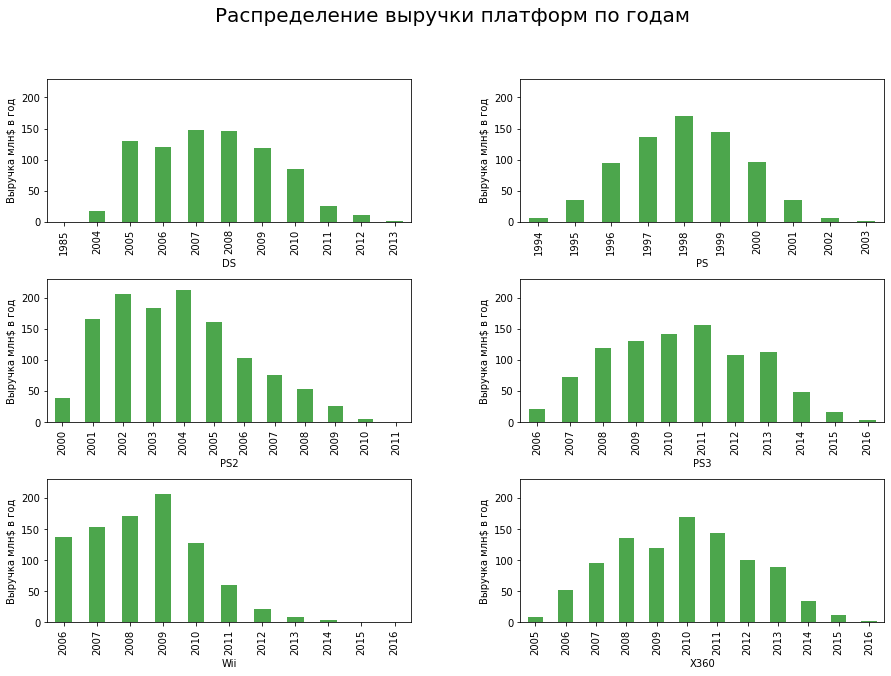

In [ ]:
# И для наглядности построим графики
plt.figure(figsize = (15, 10)).suptitle('Распределение выручки платформ по годам', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def draw_graph(i, plat):
    plt.subplot(3, 2, i)
    platform_top.query('platform == @plat')\
                 .groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', color='green', alpha = 0.7)
    plt.xlabel(plat)
    plt.ylabel('Выручка млн$ в год')
    plt.ylim(0, 230)

def create_graphs():
    i = 1
    for name in platform_top['platform'].unique():
        draw_graph(i, name)
        i += 1
        
create_graphs()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично!👍  </div>

In [ ]:
platform_top.groupby('platform').agg({'year_of_release' : 'max'}) -  platform_top.groupby('platform').agg({'year_of_release' : 'min'})

,year_of_release
platform,
DS,28
PS,9
PS2,11
PS3,10
Wii,10
X360,11


<div class="alert alert-block alert-info"> 
<b> 3.3 Определим актуальный период
</div>

Можно сделать вывод, что средний срок жизни платформы примерно 9-10 лет, а активная фаза составляет 5-6 лет, поэтому <b>актуальным</b> преиодом для построения прогноза на 2017й возьмем этап 2012-2016гг

In [ ]:
period = games[games['year_of_release'] > 2012]
period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Согласен с выбранным актуальным периодом! </div>

Осталось всего 2233 записи, будем работать с ними. Повторим операции которые мы проводили ранее, посмотрим динамику для актуального периода

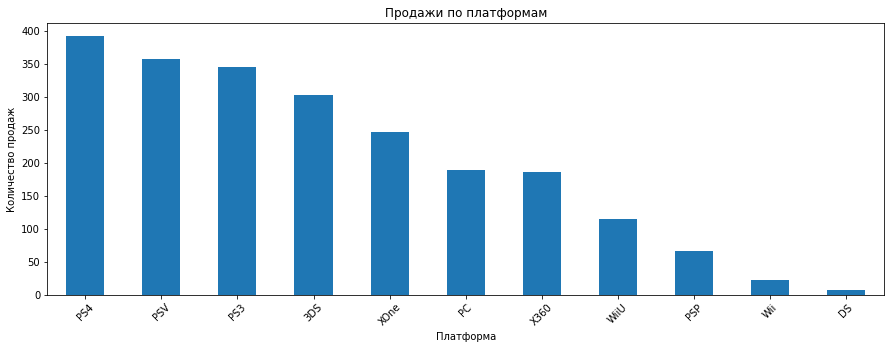

In [ ]:
period['platform'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation = 45)
plt.ylabel('Количество продаж');

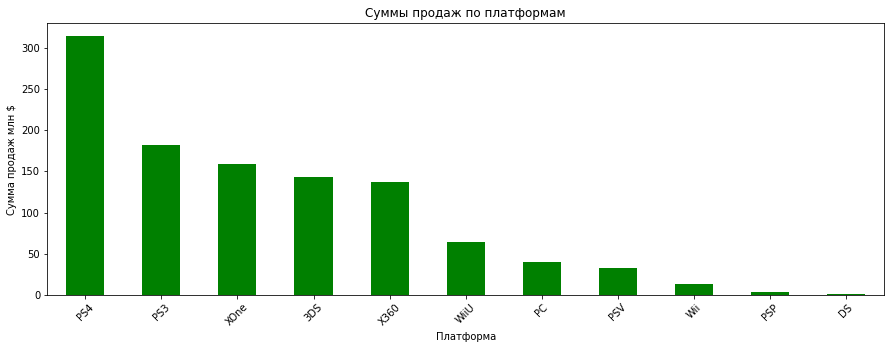

In [ ]:
(
    period
    .pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', color='green', legend = False, figsize=(15,5))
)
plt.title('Суммы продаж по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation = 45)
plt.ylabel('Сумма продаж млн $');

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Обрати внимание, что сумм продаж в деньгах у нас в данных нет </div>
✔

<div class="alert alert-block alert-info"> 
<b> 3.4 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
</div>

В лидерах по продажам за актуальный период снова представители SONY, Microsoft и консоль от Nintendo, но уже преимущественно новые модели.  Посмотрим на топ-5

In [ ]:
platform_year_p = pd.DataFrame(period.groupby(['platform','year_of_release'])['total_sales'].sum())
platform_list_p = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
platform_top_p = platform_year_p.query('platform in @platform_list_p').reset_index()
platform_top_p

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PS3,2013,113.25
5,PS3,2014,47.76
6,PS3,2015,16.82
7,PS3,2016,3.60
8,PS4,2013,25.99
9,PS4,2014,100.00


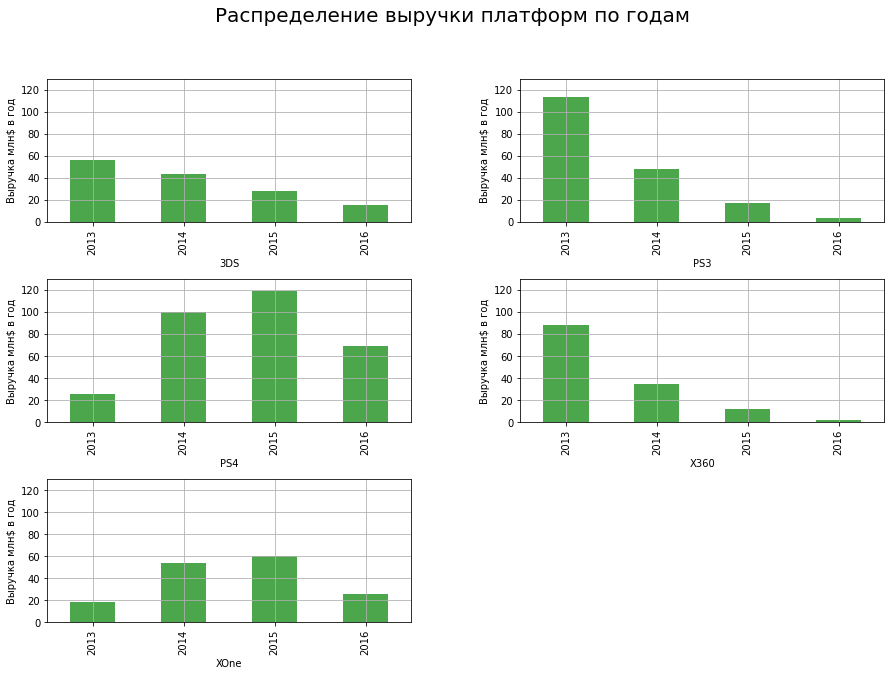

In [ ]:
plt.figure(figsize = (15, 10)).suptitle('Распределение выручки платформ по годам', fontsize = 20, x = 0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def draw_graph(i, plat):
    plt.subplot(3, 2, i)
    platform_top_p.query('platform == @plat')\
                 .groupby('year_of_release')['total_sales'].sum()\
                 .plot( kind='bar', grid=True, color='green', alpha = 0.7)
    plt.xlabel(plat)
    plt.ylabel('Выручка млн$ в год')
    plt.ylim(0, 130)

def create_graphs():
    i = 1
    for name in platform_top_p['platform'].unique():
        draw_graph(i, name)
        i += 1
        
create_graphs()

По всем компаниям наблюдаем снижение выручки, а ведь до новых приставок еще далеко, PS5, XBOX S и X выйдут только в 2020м только Nintendo Switch в 2017м

In [ ]:
period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


<div class="alert alert-block alert-info"> 
<b> 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
</div>

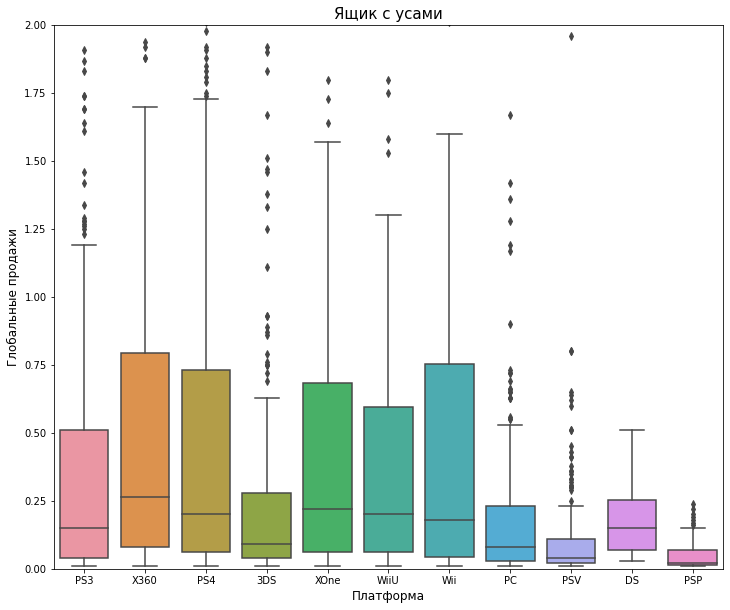

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data=period, x='platform', y='total_sales')
plt.ylim([0,2])
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отличные ящики получились! </div>

Медиана у топовых платформ находится в промежутке от 0,2 до 0,265 млн долларов прибыли за игру.
Можно выделить четырех лидеров, у которых верхняя граница предела находится на уровне 1,6-1,75 млн долларов, это PS4, X360, Wii и Xbox One. WiiU и PS3 от 1 до 1,3 млн долл. и остальные менее 750 тыс. долл.

<div class="alert alert-block alert-info"> 
<b> 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
</div>

Самый лидер - PS4. Средняя выручка на одну игру составляет 801 тыс.дол. Максимальная выручка 14.6 млн.дол.  
Посмотрим, как влияют на продажи внутри этой платформы отзывы пользователей и критиков:

In [ ]:
ps4 = period.query('platform == "PS4"')
ps4=ps4.query('user_score != -1 and critic_score !=1')
ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47


In [ ]:
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

<div class="alert alert-block alert-info"> 
<b> отфильтровали заглушки, корреляция заметно снизилась и стала обратной</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Ты забыл отфильтровать заглушки(
    
Вообще, любые заполнения вызывают искажения при расчете статистик, все основные методы pandas по-умолчанию убирают пропуски при расчетах (среднее, медиана, корреляция и тд). Поэтому их можно не заполнять, чтобы не делать лишних действий и избежать ошибок.
    </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

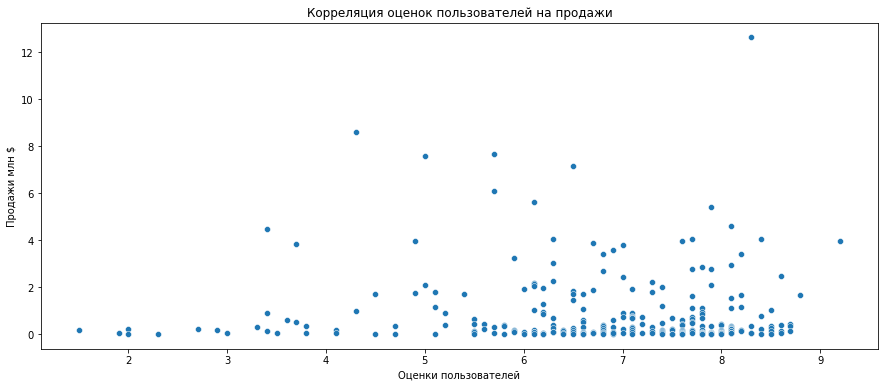

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.title('Корреляция оценок пользователей на продажи')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи млн $');

In [ ]:
ps4['critic_score'].corr(ps4['total_sales'])

0.3504074587850579

<div class="alert alert-block alert-info"> 
<b> после фильтрации заглушек влияние оценок критиков заметно увеличилось</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Аналогично и здесь
    </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [ ]:
ps4['critic_score'].describe()

count    257.000000
mean      69.856031
std       17.735213
min       -1.000000
25%       65.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

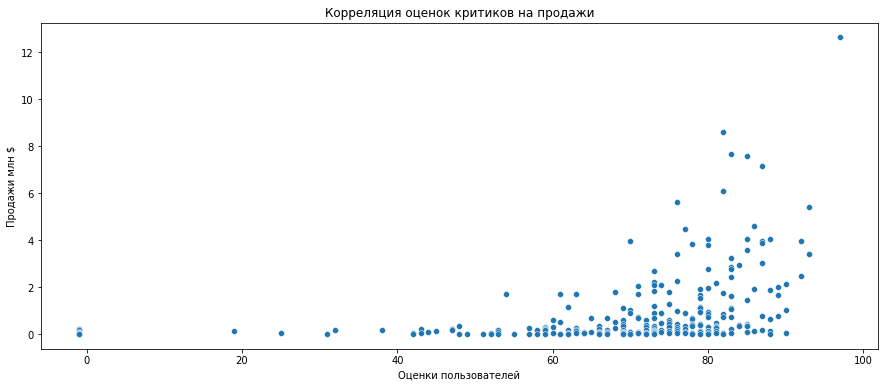

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title('Корреляция оценок критиков на продажи')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи млн $');

<div class="alert alert-block alert-info"> 
<b> Корелляция оценок критиков на продажи в сильно выше корреляции оценок пользователей, но в целом оказывает не такое уж большое влияние 
    
   
   3.6 Взглянем на другие платформы: 
    </div>
  



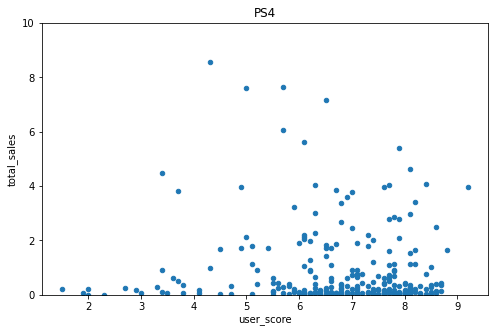

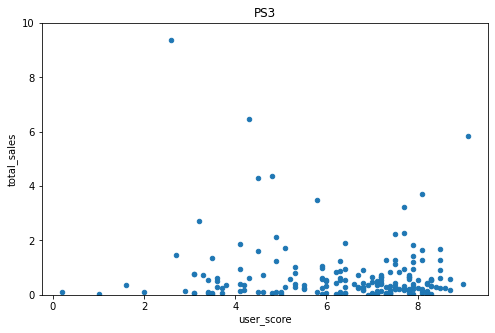

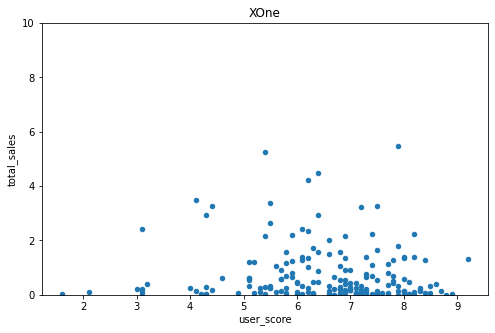

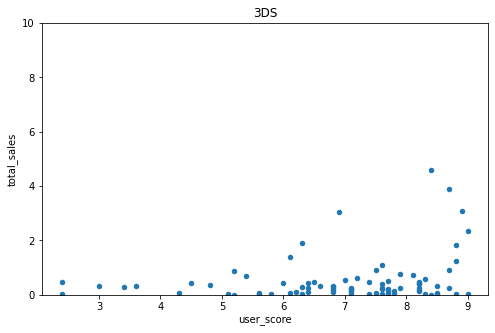

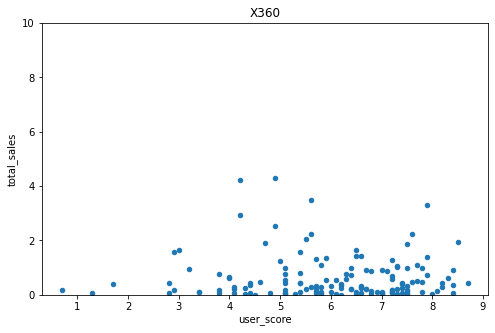

In [ ]:
# Построим графики корреляции по оценкам пользователей
for platform in platform_list_p:
    (
    period
    .query('platform == @platform and user_score != -1 and critic_score !=1')
    .plot(x='user_score', y='total_sales', kind='scatter', title=platform, figsize=(8,5))
    )
    plt.ylim(0,10)

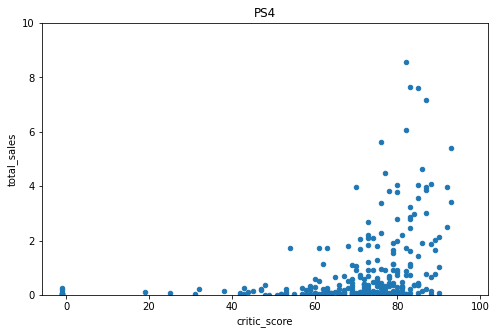

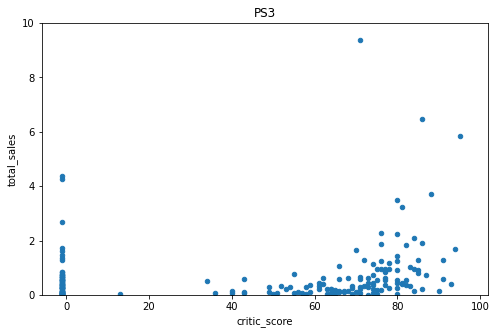

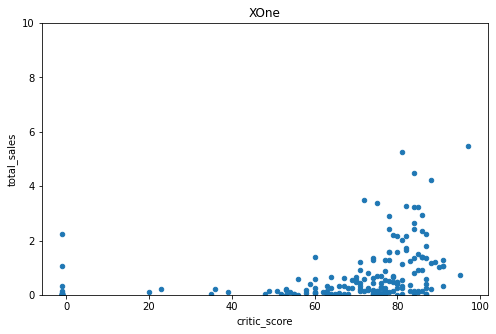

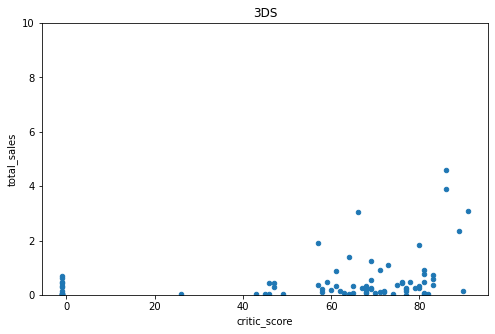

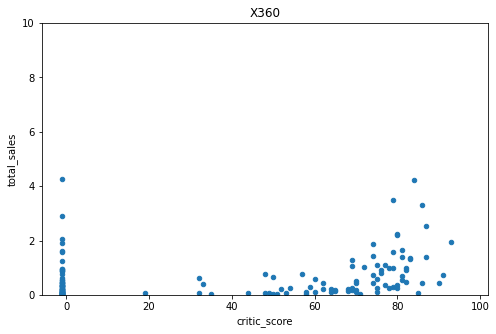

In [ ]:
# Построим графики корреляции по оценкам критиков
for platform in platform_list_p:
    (
    period
    .query('platform == @platform and user_score != -1 and critic_score !=1')
    .plot(x='critic_score', y='total_sales', kind='scatter', title=platform, figsize=(8,5))
    )
    plt.ylim(0,10)

In [ ]:
# Посмотрим на корреляцию в таблицах
for platform in platform_list_p:
    (
    display(platform, period
    .query('platform == @platform and user_score != -1 and critic_score !=1')[['total_sales', 'critic_score', 'user_score']]
    .corr())
    )
    print()

'PS4'

,total_sales,critic_score,user_score
total_sales,1.000000,0.350407,-0.031957
critic_score,0.350407,1.000000,0.385579
user_score,-0.031957,0.385579,1.000000


'PS3'

,total_sales,critic_score,user_score
total_sales,1.000000,0.191187,0.002394
critic_score,0.191187,1.000000,0.339011
user_score,0.002394,0.339011,1.000000


'XOne'

,total_sales,critic_score,user_score
total_sales,1.000000,0.333579,-0.068925
critic_score,0.333579,1.000000,0.247230
user_score,-0.068925,0.247230,1.000000


'3DS'

,total_sales,critic_score,user_score
total_sales,1.000000,0.277904,0.241504
critic_score,0.277904,1.000000,0.546697
user_score,0.241504,0.546697,1.000000


'X360'

,total_sales,critic_score,user_score
total_sales,1.000000,0.256209,-0.011742
critic_score,0.256209,1.000000,0.320265
user_score,-0.011742,0.320265,1.000000


#### Вывод по корреляции: 
В целом влияние оценок на продажи присутствует, но не такое уж и большое, особено слабо влияют оценки пользователей
Оценки критиков сильнее всего влияют на продажи у платформ PS4 и XOne, наименьшее влияние на PS3
Оценки пользователей больше всего влияют на 3DS с корреляцией 0.24

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Вывод в принципе верный, но коэффициенты корреляции расчитаны неправильно </div>
<div class="alert alert-block alert-info"> 
<b> пересчитал ✔ </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>


<div class="alert alert-block alert-info"> 
<b> 3.8 Посмотритм на общее распределение игр по жанрам: </div>

In [ ]:
genre = (
    pd
    .pivot_table(period, index='genre', values='total_sales', aggfunc='mean')
    .reset_index()
    .sort_values('total_sales', ascending=False)
)
genre

,genre,total_sales
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294
2,Fighting,0.441375
0,Action,0.420196
3,Misc,0.405290
9,Simulation,0.350968
5,Puzzle,0.186471


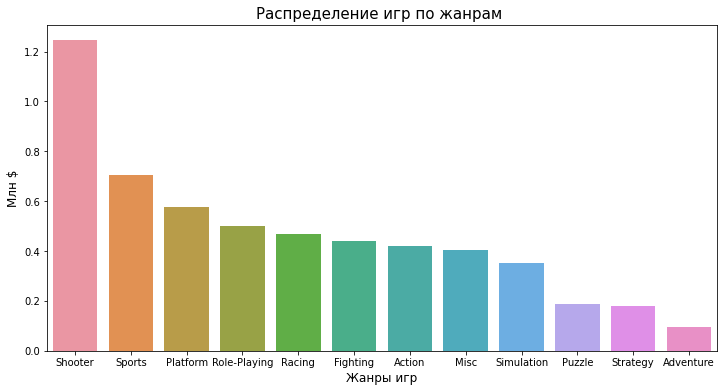

In [ ]:
# Для наглядности построим график
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Млн $',fontsize=12);

~~#### Вывод по жанрам:  
В лидерах по выручке жанры Экшн и Шутер, следом идут спортивные и ролевые игры, в аутсайдерах стратегии и пазлы, но нужно иметь ввиду что производство лидеров в разы дороже остальных~~

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
А если посмотреть средние значения продаж на одну выпущенную игру? Изменится ли порядок лидеров?
</div>

<div class="alert alert-block alert-info"> 
<b> Вывод по жанрам: Единоличный лидер теперь шутер, с 1,2 млн штук продаж, спорт на втором месте с отставанием более чем в полмиллина штук и Платфо́рмеры замыкают тройку лидеров </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

### ШАГ 4 Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):  

-Самые популярные платформы (топ-5)  
-Самые популярные жанры (топ-5)  
-Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Информация по Северной Америке


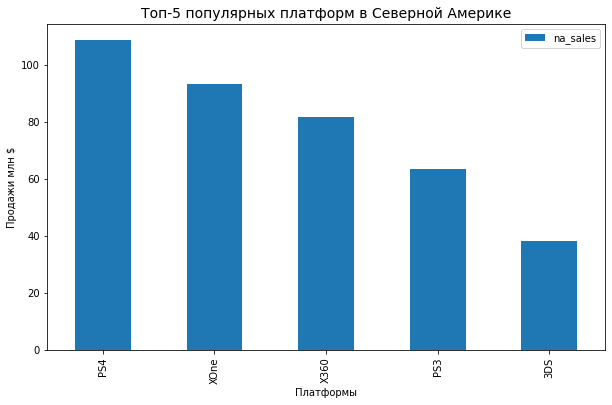

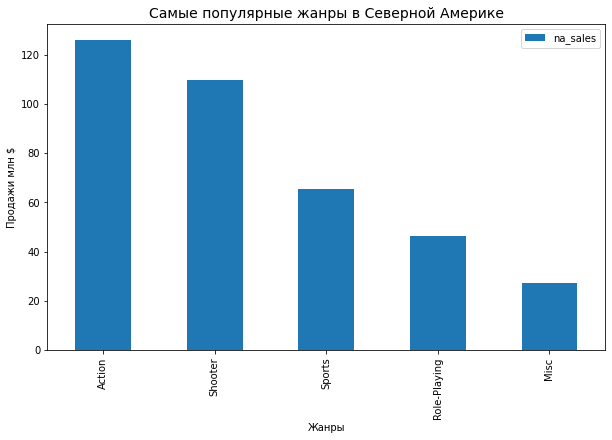

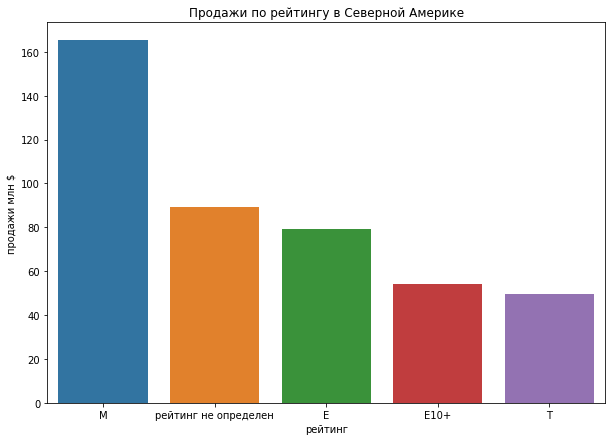

In [ ]:
print('Информация по Северной Америке')
na = period.query('na_sales > 0')
na_sales = (
    pd.pivot_table(na, index='platform', values='na_sales',aggfunc='sum')
.sort_values('na_sales', ascending=False)
.reset_index()
.head()
)


na_sales.plot(x='platform', y='na_sales', kind='bar', figsize=(10, 6))
plt.title('Топ-5 популярных платформ в Северной Америке', size=14)
plt.xlabel('Платформы')
plt.ylabel('Продажи млн $');
plt.show()


(
pd
.pivot_table(na, index='genre', values='na_sales',aggfunc='sum')
.sort_values('na_sales', ascending=False)
.reset_index()
.head()
.plot(x='genre', y='na_sales', kind='bar', figsize=(10, 6))
)
plt.title('Самые популярные жанры в Северной Америке', size=14)
plt.xlabel('Жанры')
plt.ylabel('Продажи млн $')
plt.show()

# Влияние рейтинга на регион
rating_na = (
    pd
    .pivot_table(na, index='rating', values='na_sales',aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .reset_index()
)


plt.figure(figsize=(10,7))
sns.barplot(data=rating_na, x='rating', y='na_sales')
plt.title('Продажи по рейтингу в Северной Америке')
plt.ylabel('продажи млн $')
plt.xlabel('рейтинг');

##### Вывод по Америке:

Самые популярные игровые платформы в Северной Америке: PS4, XOne, X360, PS3, 3DS.  
Топ 5 жанров в Северной Америке : action, shooter, sports, Role-Playing, misc.  
По влиянию рейтинга больше всего продаж у категории M - Игры предназначены только для лиц старше 17 лет. Что в целом объяснимо популярностью по жанрам.  
Много продаж игр, у котрых рейтинга нет и замыкают тройку игры с категорией E (Everyone) — для всех

Информация по Европе


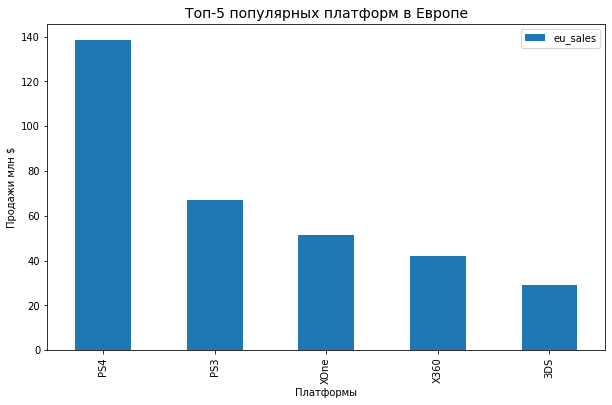

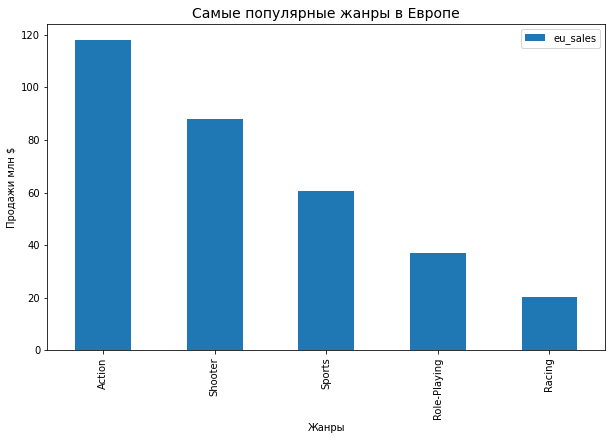

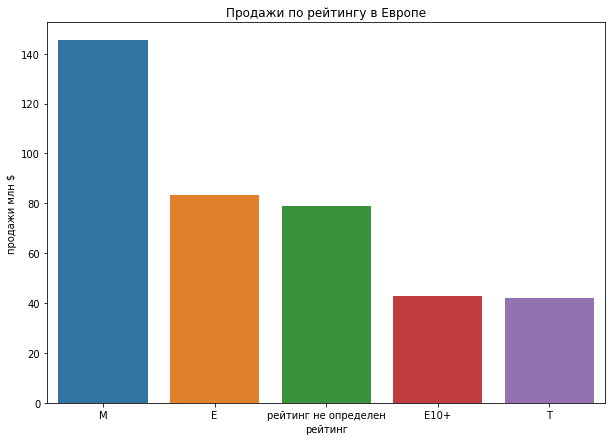

In [ ]:
print('Информация по Европе')
eu = period.query('eu_sales > 0')
eu_sales = (
    pd.pivot_table(na, index='platform', values='eu_sales',aggfunc='sum')
.sort_values('eu_sales', ascending=False)
.reset_index()
.head()
)

eu_sales.plot(x='platform', y='eu_sales', kind='bar', figsize=(10, 6))
plt.title('Топ-5 популярных платформ в Европе', size=14)
plt.xlabel('Платформы')
plt.ylabel('Продажи млн $')
plt.show()

(
pd
.pivot_table(eu, index='genre', values='eu_sales',aggfunc='sum')
.sort_values('eu_sales', ascending=False)
.reset_index()
.head()
.plot(x='genre', y='eu_sales', kind='bar', figsize=(10, 6))
)
plt.title('Самые популярные жанры в Европе', size=14)
plt.xlabel('Жанры')
plt.ylabel('Продажи млн $')
plt.show()

# Влияние рейтинга на регион
rating_eu = (
    pd
    .pivot_table(eu, index='rating', values='eu_sales',aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .reset_index()
)


plt.figure(figsize=(10,7))
sns.barplot(data=rating_eu, x='rating', y='eu_sales')
plt.title('Продажи по рейтингу в Европе')
plt.ylabel('продажи млн $')
plt.xlabel('рейтинг');

##### Вывод по Европе:
Самые популярные игровые платформы в Европе все те же, что и в Америке, с небольшой ротацией:  
с большим отрывом лидирует PS4, далее PS3, XOne, X360, и 3DS
По жанрам значения также близки к Северной Америке, единственное отличие вместо Misc на 5м месте Racing  
По влиянию рейтинга тройка лидеров та же, с рокировкой рейтинга E (Everyone) — для всех и играми без рейтинга

Информация по Японии


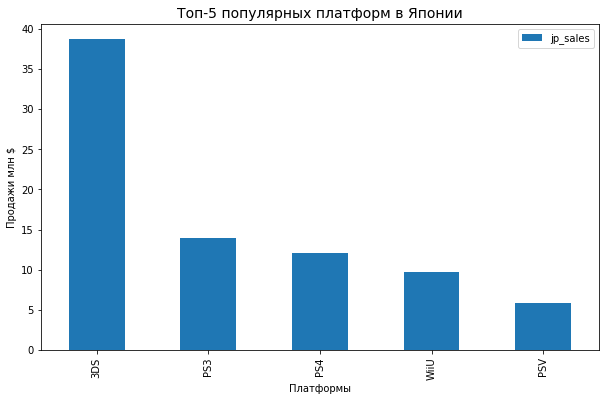

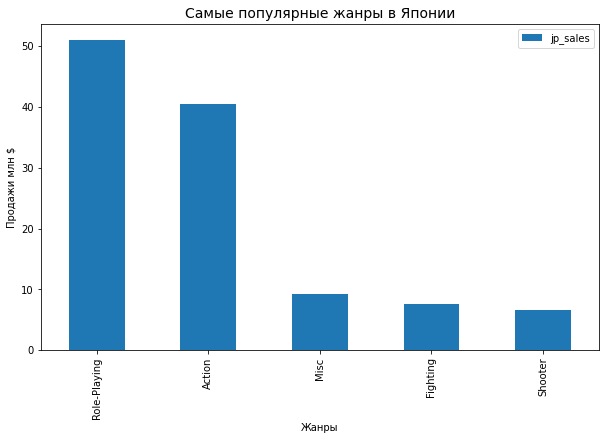

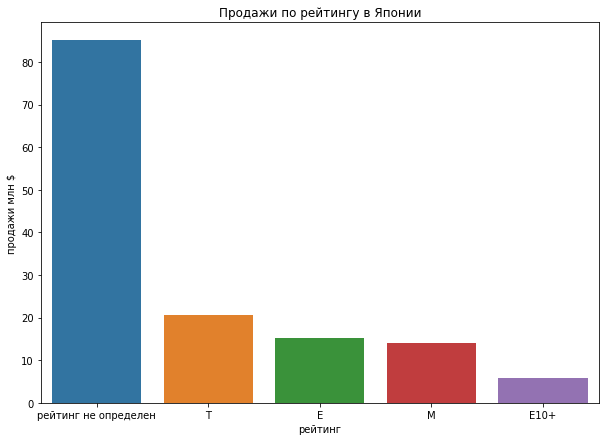

In [ ]:
print('Информация по Японии')
jp = period.query('jp_sales > 0')
jp_sales = (
    pd.pivot_table(na, index='platform', values='jp_sales',aggfunc='sum')
.sort_values('jp_sales', ascending=False)
.reset_index()
.head()
)

jp_sales.plot(x='platform', y='jp_sales', kind='bar', figsize=(10, 6))
plt.title('Топ-5 популярных платформ в Японии', size=14)
plt.xlabel('Платформы')
plt.ylabel('Продажи млн $')
plt.show()

(
pd
.pivot_table(jp, index='genre', values='jp_sales',aggfunc='sum')
.sort_values('jp_sales', ascending=False)
.reset_index()
.head()
.plot(x='genre', y='jp_sales', kind='bar', figsize=(10, 6))
)
plt.title('Самые популярные жанры в Японии', size=14)
plt.xlabel('Жанры')
plt.ylabel('Продажи млн $');
plt.show()

# Влияние рейтинга на регион
rating_jp = (
    pd
    .pivot_table(jp, index='rating', values='jp_sales',aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .reset_index()
)


plt.figure(figsize=(10,7))
sns.barplot(data=rating_jp, x='rating', y='jp_sales')
plt.title('Продажи по рейтингу в Японии')
plt.ylabel('продажи млн $')
plt.xlabel('рейтинг');

##### Вывод по Японии:
Предпочтения игроков в Японии сильно отличаются от европейцев и североамериканцев:  
С огромным отрывом лидирует платформа 3DS, хотя и SONY и Nintendo - это компании из Японии, но как мне кажется Нинтендо большее внимание уделяет именно внутреннему рынку, и игры на 3DS в большинстве выпускаются в популярных именно в Японии жанрах.  
В лидерах также PS3, PS4, WiiU и PSV
По жанрам, как и предполагал выше у нас оказываются РПГ и Экшн, остальная тройка лидеров в лице Аркад, Файтингов и Шутеров сильно уступают. 
По рейтингу наблюдаем главенство игр без рейтинга, оно и понятно, как указывал ранее данный рейтинг предназначен для игр из Северной Америки На втором месте по продажам игры с рейтингом: T — для подростков 12+, далее уже знакомые нам E и M 

### Вывод по регионам
Изучив данные по регионам можем предположить, что, для 2017 года большую часть прибыли будут приносить игры жанра Action для платформы PS4 и с рейтингом M - от 17 и выше.  
С поправками на регион конечно же. Северная Америка и Европа в целом схожи по своим предпочтениям, с незначительными отклонениями.  
В Японии своя культура игровой индустрии, и здесь лидерами все же будет платформа 3DS (забегая в будущее Nintendo Switch все же обгонит по продажам устаревающую приставку), с жанром RPG без какого либо рейтинга.

#### Шаг 5. Проверим гипотезы:
<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
hypo=period[period['platform'].isin(['PC', 'XOne'])].dropna()
hypo=hypo.query('user_score != -1')

# Дисперсии
print(np.var(hypo.query('platform =="XOne"')['user_score']))
print(np.var(hypo.query('platform =="PC"')['user_score']))

1.8965188383045526
3.016306347554631


In [ ]:
alpha = 0.01

results = st.ttest_ind(
    hypo.query('platform =="XOne"')['user_score'],
    hypo.query('platform =="PC"')['user_score'],
    equal_var = False)

# проверяем значение pvalue с некоторой точностью
print('p-значение:', results.pvalue)

# проверяем output
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги платформ XOne и PC разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу так как cредние пользовательские рейтинги платформ XOne и PC одинаковые")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу так как cредние пользовательские рейтинги платформ XOne и PC одинаковые


Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [ ]:
hypo=period[period['genre'].isin(['Sports', 'Action'])]

# Дисперсии
print(np.var(hypo.loc[hypo['genre']=='Action', 'user_score']))
print(np.var(hypo.loc[hypo['genre']=='Sports', 'user_score']))

16.249188487207633
9.704826840772121


In [ ]:
alpha = 0.01

results = st.ttest_ind(
    hypo.query('genre =="Action"')['user_score'],
    hypo.query('genre =="Sports"')['user_score'],
    equal_var = False)

# проверяем значение pvalue с некоторой точностью
print('p-значение:', results.pvalue)

# проверяем output
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не получилось отвергнуть нулевую гипотезу так как cредние пользовательские рейтинги жанров Action и Sports одинаковые")

p-значение: 0.008445505365573197
Отвергаем нулевую гипотезу, так как cредние пользовательские рейтинги жанров Action и Sports разные.


## Шаг 6.  Общий вывод

- Был проведен первичный анализ данных файла, отредактирован датасет путем удалениия некритичных данных, изменили типы некторых столбцов и заполнили пропуски
- Далее добавили в таблицу новые столбцы и заполнили их данными для последующего анализа

<b> По проведенному анализу: влияние оценок на выручку имеет место быть, оценки критиков сильнее оценок пользователей. Но в целом влияние не такое сильное.

<b> В целом по игровой индустрии: рынок платформенных игр заметно снижается. Хотя, заглянув в будущее мы видим обновления устаревающих консолей, но динамика все же отрицательная. Вероятнее всего, что мобильный телефон начал побеждать в этом плане, но это уже совсем другая история, и хороший повод для нового анализа)

<b> По жанрам глобально лидируют Shooter, и скорее всего продолжат доминирование, локально же в Японии в лидерах жанр RPG